In [1]:
import typing
from scipy.sparse import spmatrix, csr_matrix
from nptyping import NDArray, Shape
import torch
from scipy.spatial.distance import squareform
import numpy as np

In [2]:
from paradime.dissimilarity import NeighborBased
from paradime.transforms import PerplexityBased

In [3]:
data = torch.rand((500,10))

# labels = torch.tensor([1, 2, 3, 2])

# other = torch.tensor([ 100., 200., 150., 50. ])

In [13]:
diss = NeighborBased(90, verbose=True#,
    # transform=PerplexityBased(30, verbose=True)
)

In [10]:
import scipy.sparse
import scipy.optimize
from numba import jit

In [103]:
np.where(np.ones((5,5)))

(array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
        4, 4, 4], dtype=int64),
 array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
        2, 3, 4], dtype=int64))

In [107]:
np.tile(np.arange(0,5),5)

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4])

In [83]:
def transform(X, perp):

    neighbors, distances = X
    p_ij = np.empty_like(distances[:,1:])
    num_pts = len(neighbors)
    k = neighbors.shape[1]

    for i in [0]:#range(num_pts):
        beta = find_beta(distances[i][1:], perp)
        print(beta)
        p_ij[i] = p_i(distances[i][1:], beta)
    row_indices = np.repeat(np.arange(num_pts), k-1)

    return p_ij, row_indices
    # p = scipy.sparse.csr_matrix((
    #     p_ij.ravel(),
    #     (row_indices, neighbors.ravel())
    # ))

    # return p

@jit
def entropy(dists, beta):
    x = dists * beta
    y = np.exp(x)
    ysum = y.sum()

    if ysum < 1e-50:
        result = -1.
    else:
        factor = - 1/(np.log(2.) * ysum)
        result = factor * ((y * x) - (y * np.log(ysum))).sum()
    
    return result


def p_i(dists, beta):

    x = - dists * beta
    y = np.exp(x)
    ysum = y.sum()

    return y / ysum

def find_beta(dists, perp, upper_bound = 1e6):
    return scipy.optimize.root_scalar(
        lambda b: entropy(dists, b) - np.log2(perp),
        bracket=(0.,upper_bound)
    ).root

In [84]:
foo = diss.compute_dissimilarities(data)

2022-06-03 14:38:37.8: Indexing nearest neighbors.


In [85]:
transform(foo.diss, 30)

0.0


(array([[0.01123596, 0.01123596, 0.01123596, ..., 0.01123596, 0.01123596,
         0.01123596],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [1.1092812 , 1.110862  , 1.1120436 , ..., 1.0045443 , 1.0067068 ,
         1.0117415 ],
        [1.0145838 , 1.0156741 , 1.016718  , ..., 0.79443675, 0.8016059 ,
         0.81218356],
        [0.81831187, 0.8195888 , 0.82333726, ..., 0.7985423 , 0.8026194 ,
         0.80344385]], dtype=float32),
 array([  0,   0,   0, ..., 499, 499, 499]))

In [45]:
from matplotlib import pyplot as plt

In [52]:
bar = [ 2**entropy(foo.diss[1][1], i) for i in np.arange(0.0, 50., 0.1) ]

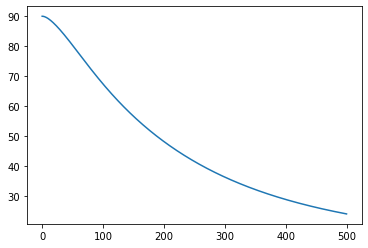

In [53]:
plt.plot(bar)